In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from parking import get_cars_parked, load_excel_files_into_df

In [3]:
data = load_excel_files_into_df("../../data/parking_data", ".xlsx")

All files in ../../data/parking_data loaded!


In [4]:
result = get_cars_parked(data)

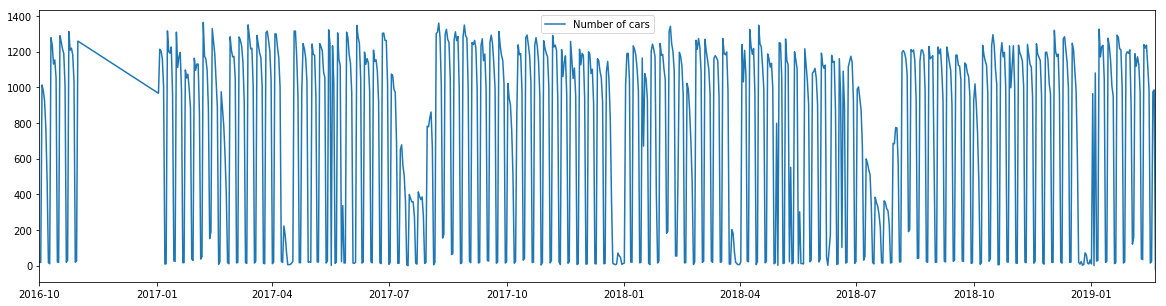

In [5]:
cars_per_day = result.copy()
cars_per_day.plot(figsize=(20,5));

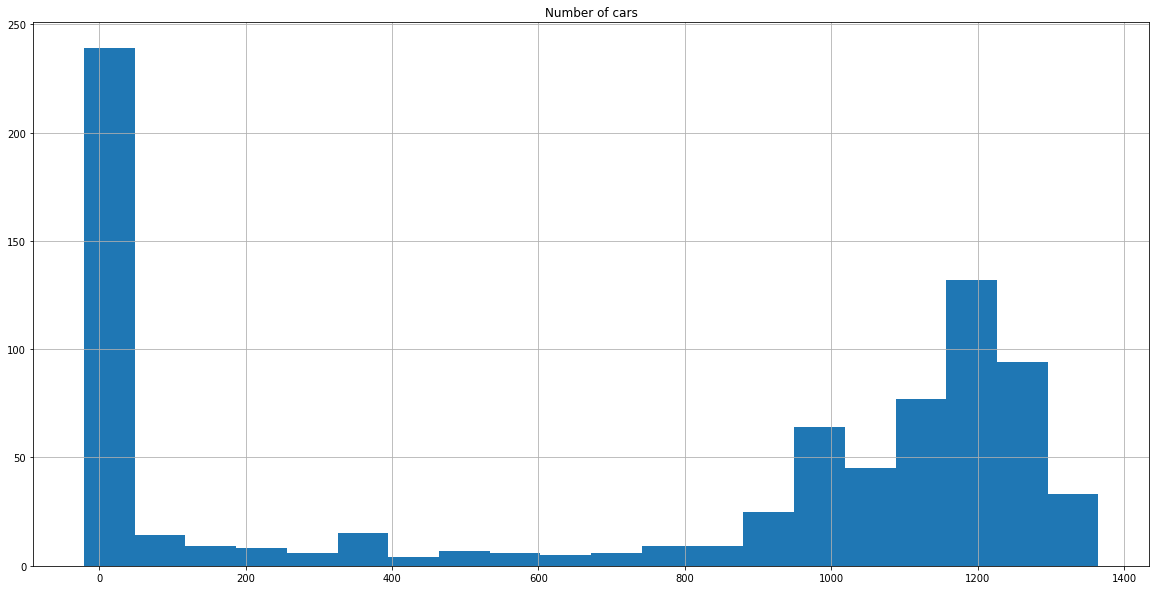

In [6]:
number_of_cars = result.copy()
number_of_cars.hist(column='Number of cars', figsize=(20,10), bins=20);

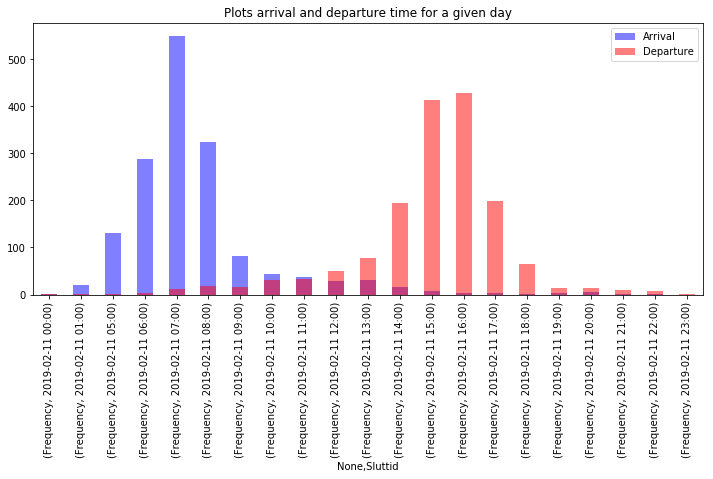

In [11]:
def filter_data_to_plot(dataframe, new_index, column, date, label, color):
    df = dataframe.copy()
    df.index = pd.to_datetime(df.pop(new_index))
    df = df[date]
    df = df.rename(columns={"Payment status": "Frequency"})
    df = df.drop(["Avdeling", column], axis=1)
    df = df.groupby(df.index.to_period("H")).count().unstack()
    df.plot(figsize=(12,5), kind='bar', alpha=0.5, label=label, color=color)
    
plt.figure()
plt.title("Plots arrival and departure time for a given day")

date = "20190211"
filter_data_to_plot(data, "Starttid", "Sluttid", date, "Arrival", "b")
filter_data_to_plot(data, "Sluttid", "Starttid", date, "Departure", "r")

plt.legend(loc='upper right')
plt.show()